## EDA - Exploratory Data Analysis

The goal of Exploratory Data Analysis (EDA) is to understand the data, identify patterns, and prepare it for modeling. In this EDA, we will explore the relationship between gas prices, crude oil prices, and weather data to identify trends or correlations that could be useful for our prediction model.

### Step-by-Step Plan for EDA

1. Load Data from CSV Files

    - Load the gas prices, crude oil prices, and weather data CSV files into pandas DataFrames.

2. Understand the Data Structure

    - Examine the first few rows of each DataFrame to understand the structure and get a sense of the data.
    - Check for missing values and data types to ensure everything is correctly formatted.

3. Clean and Preprocess the Data

    - Handle missing values by imputing, removing, or otherwise managing the missing data.
    - Convert date columns to proper datetime formats for easier manipulation and analysis.
    - Normalize or standardize columns if necessary, especially for modeling purposes.

4. Visualize the Data

    - Use various plots such as line plots, histograms, box plots, etc., to visualize trends and distributions in the data.
    - Plot correlations between different datasets to identify potential relationships and dependencies.

5. Feature Engineering

    - Create new features that might be useful for our model, such as moving averages of prices, lagged values, or weather conditions.

6. Correlation Analysis

    - Analyze correlations between gas prices, crude oil prices, and weather data to understand how they interact and influence each other.
    - Use scatter plots, heatmaps, or pair plots to visualize these correlations and identify any significant relationships.

By following this step-by-step plan, we can gain valuable insights into the data and uncover patterns that will help us build an accurate prediction model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from datetime import timedelta
from time import time

sns.set_theme(style="whitegrid")
%matplotlib inline

# Load CSV files into DataFrames
gas_prices_df = pd.read_csv('../data/fuel_prices_ontario.csv', parse_dates=['Date'])
crude_oil_prices_df = pd.read_csv('../data/crude_oil_prices_2000_2024.csv', parse_dates=['Date'])
weather_data_df = pd.read_csv('../data/weather_data_2022_2024.csv', parse_dates=['Date'])
gas_prices_df = pd.read_csv('../data/fuel_prices_ontario.csv', parse_dates=['Date'])

# Filter gas prices data to only include dates between
# start_date = datetime(2021-01-01)
# end_date = datetime(2024-07-31)
# gas_prices_df = gas_prices_df[start_date:end_date]

# Focus only on 'Regular Unleaded Gasoline'
gas_prices_df = gas_prices_df[gas_prices_df['Fuel Type'] == 'Regular Unleaded Gasoline']

# Print head for the first few rows of each DataFrame
print("Gas Prices DataFrame:")
print(gas_prices_df.head())
print("\nCrude Oil Prices DataFrame:")
print(crude_oil_prices_df.head())
print("\nWeather Data DataFrame:")
print(weather_data_df.head())

Gas Prices DataFrame:
        Date  Ottawa  Toronto West/Ouest  Toronto East/Est  Windsor  London  \
0 1990-01-03    55.9                49.1              48.7     45.2    50.1   
1 1990-01-10    55.9                47.7              46.8     49.7    47.6   
2 1990-01-17    55.9                53.2              53.2     49.6    53.7   
3 1990-01-24    55.9                53.2              53.5     49.0    52.1   
4 1990-01-31    55.9                51.9              52.6     48.6    49.1   

   Peterborough  St. Catharine's  Sudbury  Sault Saint Marie  Thunder Bay  \
0           0.0              0.0     56.4               54.8         56.6   
1           0.0              0.0     56.4               54.9         56.8   
2           0.0              0.0     55.8               54.9         56.8   
3           0.0              0.0     55.7               54.9         56.8   
4           0.0              0.0     55.6               54.8         56.8   

   North Bay  Timmins  Kenora  Parry Sou

In [3]:
# Check for missing values
print("\nMissing values in Gas Prices DataFrame:")
print(gas_prices_df.info())

print("\nMissing values in Crude Oil Prices DataFrame:")
print(crude_oil_prices_df.info())

print("\nMissing values in Weather Data DataFrame:")
print(weather_data_df.info())

# Drop or impute missing values as needed
# For simplicity, I will drop rows with missing data
gas_prices_df = gas_prices_df.dropna()
crude_oil_prices_df = crude_oil_prices_df.dropna()
weather_data_df = weather_data_df.dropna()

# Select the 'Toronto West/Ouest' gas prices for analysis
gas_prices_toronto = gas_prices_df['Toronto West/Ouest'].dropna()

# Calculate first difference for gas prices
gas_prices_toronto_diff = gas_prices_toronto.diff()[1:]
gas_prices_toronto_diff.index = pd.to_datetime(gas_prices_toronto_diff.index)

# Calculate first difference for crude oil prices
crude_oil_close_diff = crude_oil_prices_df['Close'].diff()[1:]
crude_oil_close_diff.index = pd.to_datetime(crude_oil_close_diff.index)


Missing values in Gas Prices DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1809 entries, 0 to 1808
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           1809 non-null   datetime64[ns]
 1   Ottawa                                         1809 non-null   float64       
 2   Toronto West/Ouest                             1809 non-null   float64       
 3   Toronto East/Est                               1809 non-null   float64       
 4   Windsor                                        1809 non-null   float64       
 5   London                                         1809 non-null   float64       
 6   Peterborough                                   1809 non-null   float64       
 7   St. Catharine's                                1809 non-null   float64       
 8   Sudbury               

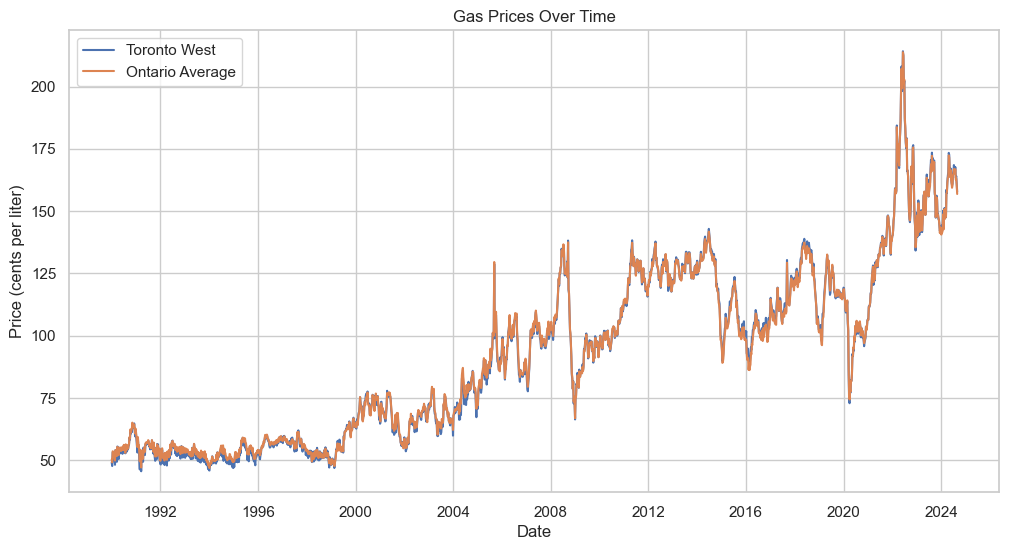

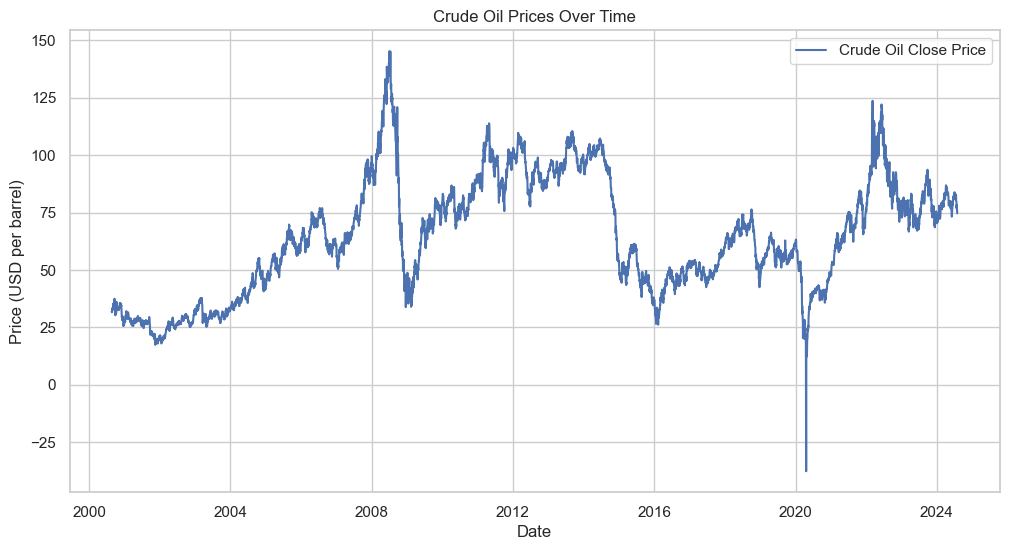

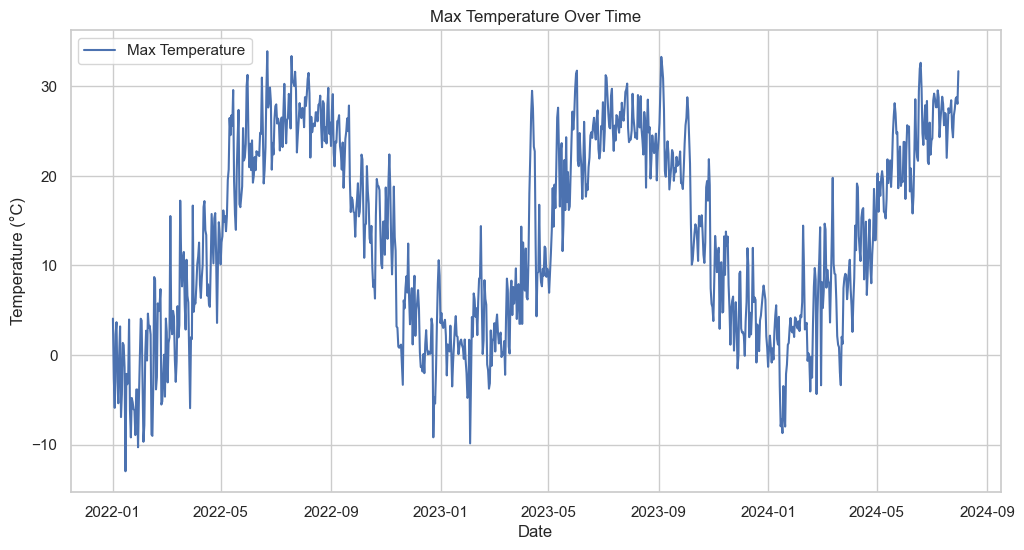

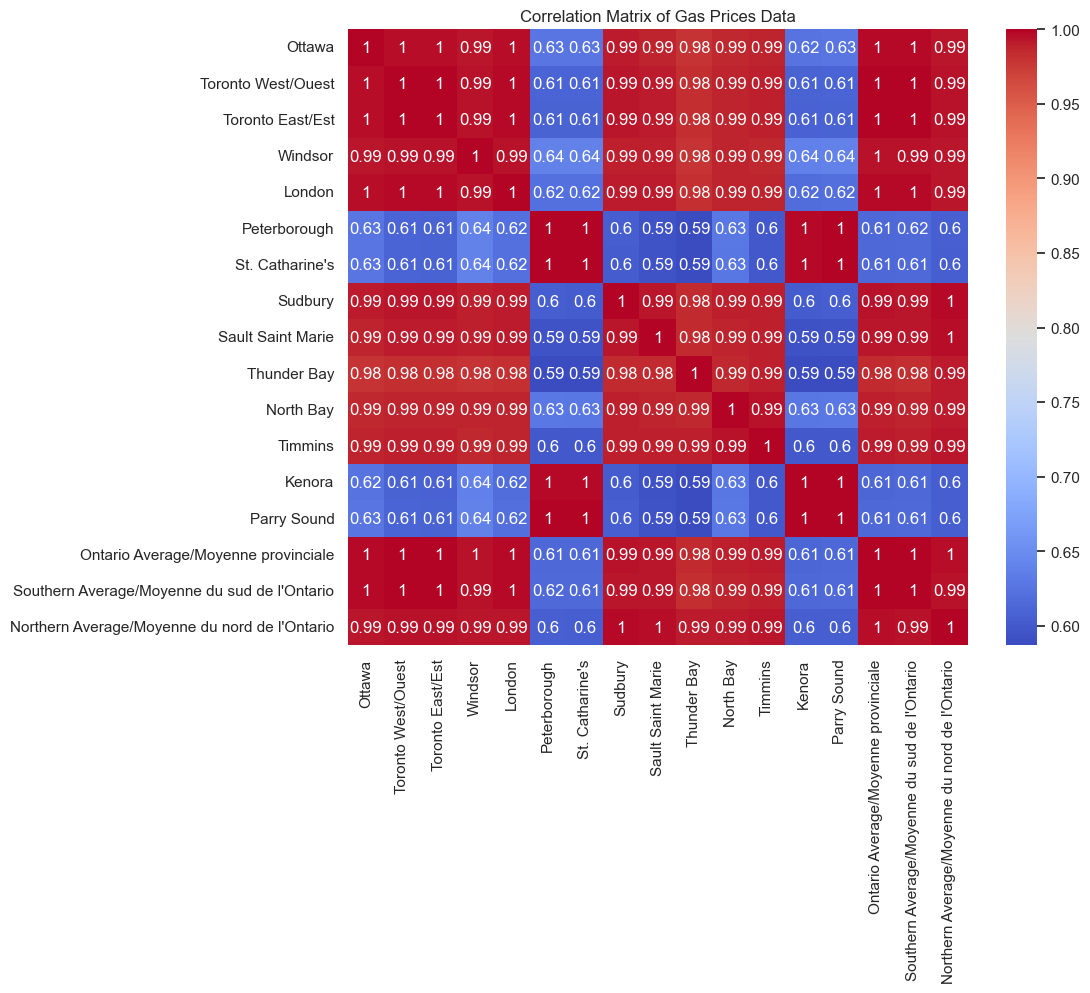

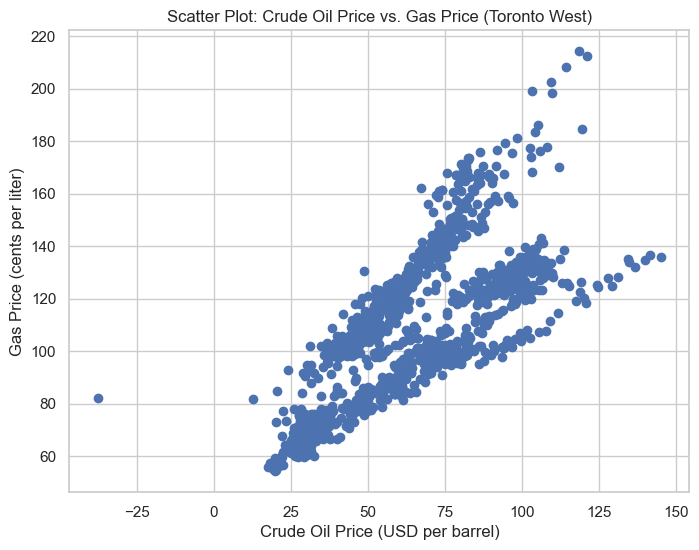

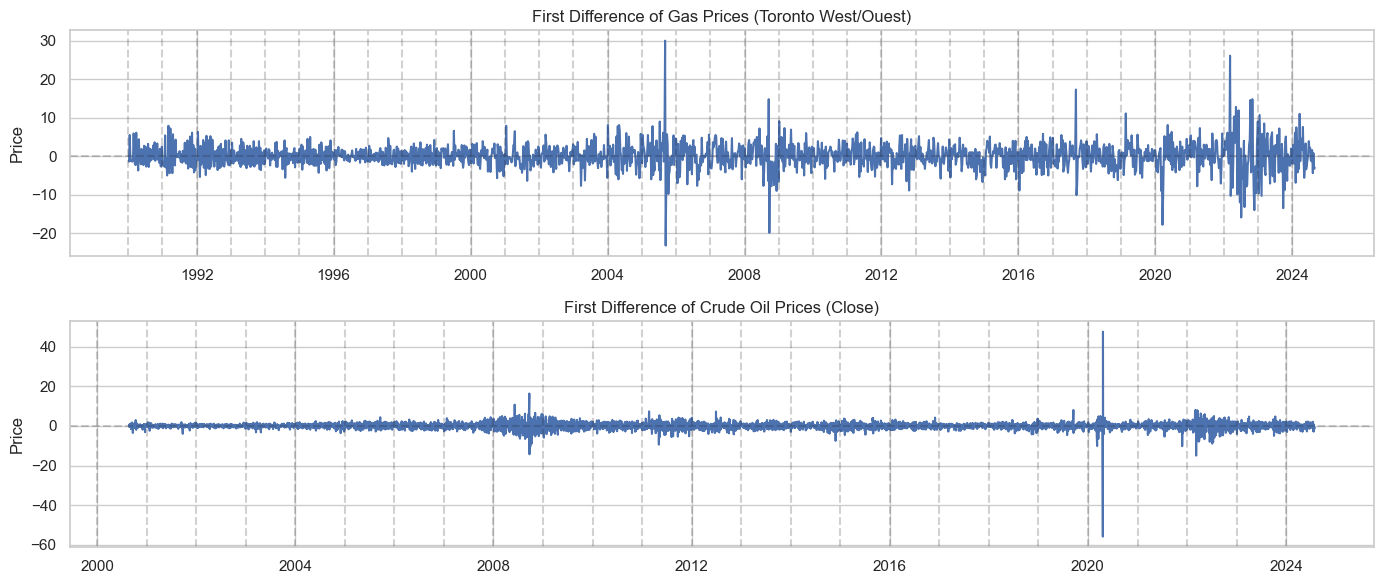

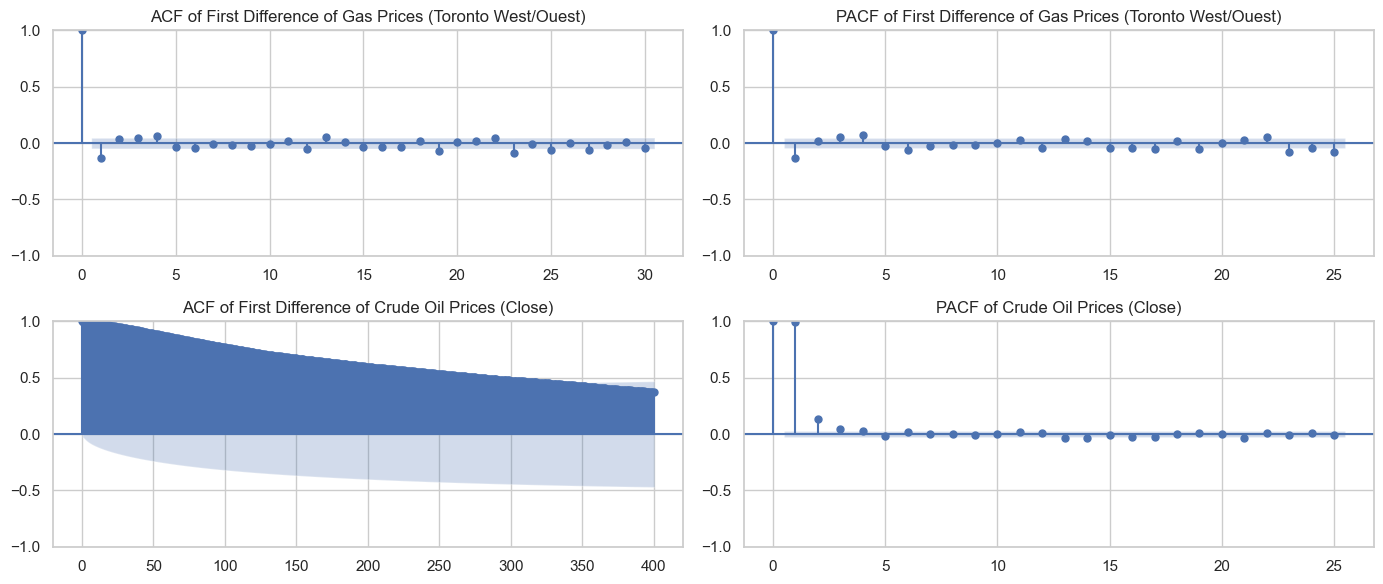

In [4]:
# Plotting trends in gas prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=gas_prices_df, x='Date', y='Toronto West/Ouest', label='Toronto West')
sns.lineplot(data=gas_prices_df, x='Date', y='Ontario Average/Moyenne provinciale', label='Ontario Average')
plt.title('Gas Prices Over Time')
plt.ylabel('Price (cents per liter)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plotting crude oil prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=crude_oil_prices_df, x='Date', y='Close', label='Crude Oil Close Price')
plt.title('Crude Oil Prices Over Time')
plt.ylabel('Price (USD per barrel)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Visualizing weather data (e.g., temperature variations over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_data_df, x='Date', y='temperature.max', label='Max Temperature')
plt.title('Max Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plotting correlations between different datasets
plt.figure(figsize=(10, 8))
sns.heatmap(gas_prices_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Gas Prices Data')
plt.show()

# Merge the gas prices and crude oil prices DataFrames on 'Date' to align them
combined_df = pd.merge(gas_prices_df[['Date', 'Toronto West/Ouest']], crude_oil_prices_df[['Date', 'Close']], on='Date', how='inner')
combined_df.set_index('Date', inplace=True)

# Scatter plot between crude oil prices and gas prices
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Close'], combined_df['Toronto West/Ouest'])
plt.title('Scatter Plot: Crude Oil Price vs. Gas Price (Toronto West)')
plt.xlabel('Crude Oil Price (USD per barrel)')
plt.ylabel('Gas Price (cents per liter)')

gas_prices_toronto_diff.index = gas_prices_df['Date'][1:]
crude_oil_close_diff.index = crude_oil_prices_df['Date'][1:]

start_date_trt = gas_prices_toronto_diff.index.min()
end_date_trt = gas_prices_toronto_diff.index.max()

start_date_oil = crude_oil_close_diff.index.min()
end_date_oil = crude_oil_close_diff.index.max()

# Plotting the first difference for gas prices
plt.figure(figsize=(14, 6))

plt.subplot(211)
plt.plot(gas_prices_toronto_diff.index, gas_prices_toronto_diff)
plt.title('First Difference of Gas Prices (Toronto West/Ouest)')
plt.ylabel('Price')
plt.axhline(0, color='k', linestyle='--', alpha=0.2) 
for year in range(start_date_trt.year, end_date_trt.year + 1):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)  

# Plotting the first difference for crude oil closing prices
plt.subplot(212)
plt.plot(crude_oil_close_diff.index, crude_oil_close_diff)
plt.title('First Difference of Crude Oil Prices (Close)')
plt.ylabel('Price')
plt.axhline(0, color='k', linestyle='--', alpha=0.2)  # Horizontal line at y=0
for year in range(start_date_oil.year, end_date_oil.year + 1):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)  

plt.tight_layout()
plt.show()

# Plot ACF and PACF for first differenced gas prices
plt.figure(figsize=(14, 6))

# ACF plot for gas prices first difference
plt.subplot(221)
plot_acf(gas_prices_toronto_diff, lags=30, ax=plt.gca())
plt.title('ACF of First Difference of Gas Prices (Toronto West/Ouest)')

# PACF plot for gas prices first difference
plt.subplot(222)
plot_pacf(gas_prices_toronto_diff, lags=25, ax=plt.gca())
plt.title('PACF of First Difference of Gas Prices (Toronto West/Ouest)')

crude_oil_close = crude_oil_prices_df['Close'][:]

# ACF plot for crude oil closing prices
plt.subplot(223)
plot_acf(crude_oil_close, lags=400, ax=plt.gca())
plt.title('ACF of First Difference of Crude Oil Prices (Close)')

# PACF plot for crude oil closing prices
plt.subplot(224)
plot_pacf(crude_oil_close, lags=25, ax=plt.gca())
plt.title('PACF of Crude Oil Prices (Close)')

plt.tight_layout()
plt.show()

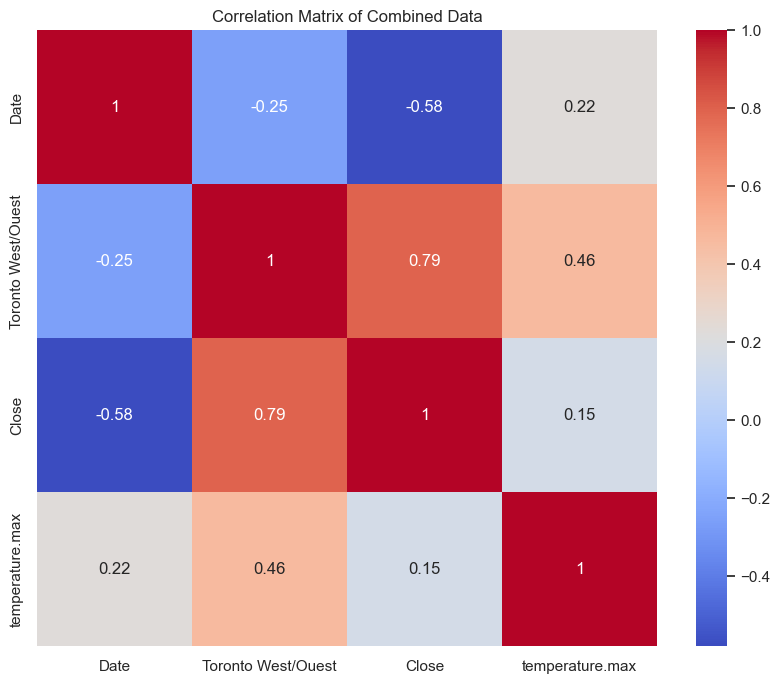

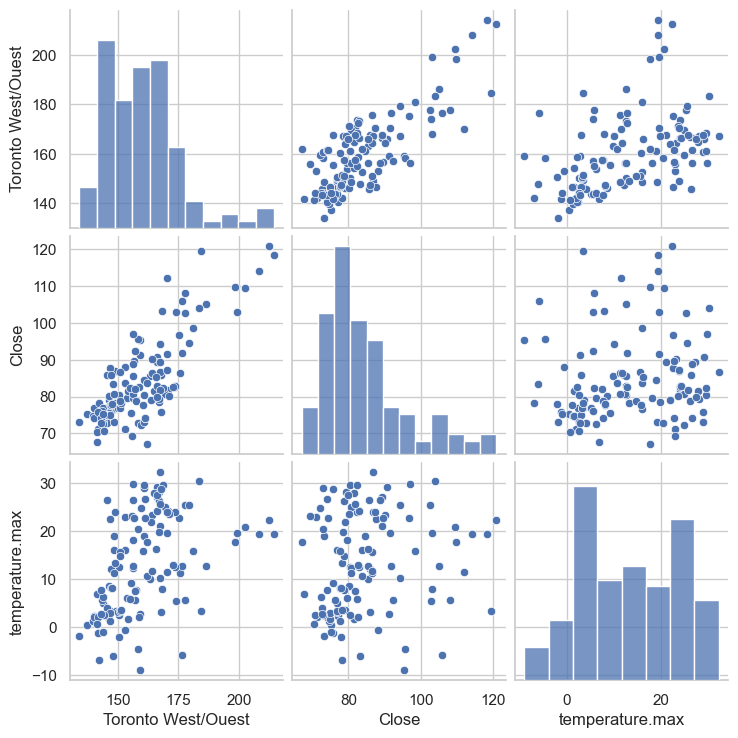

In [118]:
# Analyzing correlations between gas prices, crude oil prices, and weather data
combined_data = pd.merge(pd.merge(gas_prices_df[['Date', 'Toronto West/Ouest']], crude_oil_prices_df[['Date', 'Close']], on='Date'), weather_data_df[['Date', 'temperature.max']], on='Date')

# Correlation matrix for combined data
plt.figure(figsize=(10, 8))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Combined Data')
plt.show()

# Pair plots to visualize potential correlations
sns.pairplot(combined_data)
plt.show()

Model Fitting Time: 52215.975611925125
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8532
Model:               ARIMA(1, 0, 100)   Log Likelihood              -14364.444
Date:                Tue, 10 Sep 2024   AIC                          28934.888
Time:                        11:10:09   BIC                          29661.201
Sample:                    08-23-2000   HQIC                         29182.694
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.0962      9.100      7.044      0.000      46.261      81.932
ar.L1          0.9978      0.001   1123.894      0.000       0.996       1.000
ma.L1        

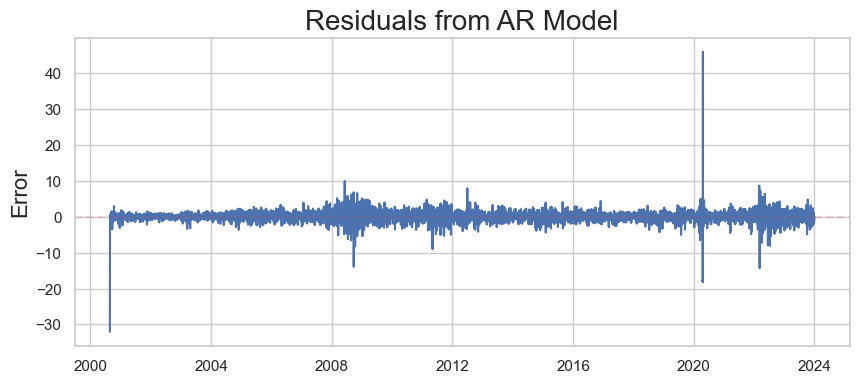

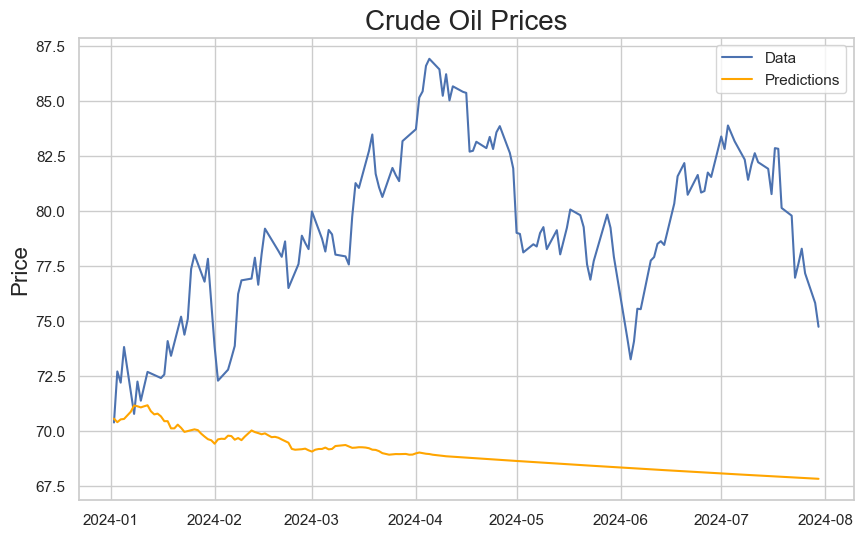

Root Mean Squared Error: 1.3477767692599842


In [6]:
from statsmodels.tsa.arima.model import ARIMA

train_end_oil = datetime(2024,1,1)
test_end_oil = datetime(2024,7,30)

crude_oil_prices_df = pd.read_csv('../data/crude_oil_prices_2000_2024.csv', parse_dates=['Date'])
crude_oil_prices_df.set_index('Date', inplace=True)
crude_oil_close = crude_oil_prices_df['Close']

crude_oil_close_resampled = crude_oil_close.resample('D').interpolate()
crude_oil_close_diff_resampled = crude_oil_close_diff.resample('D').interpolate()

train_data_oil = crude_oil_close_resampled[:train_end_oil]
test_data_oil = crude_oil_close_resampled[train_end_oil + timedelta(days=1):test_end_oil]

crude_oil_model = ARIMA(train_data_oil, order=(1,0,100))

start = time()
crude_oil_model_fit = crude_oil_model.fit()
end = time()
print('Model Fitting Time:', end - start)

print(crude_oil_model_fit.summary())
crude_oil_close.index = pd.to_datetime(crude_oil_close.index)
pred_start_date_oil = test_data_oil.index[0]
pred_end_date_oil = test_data_oil.index[-1]

start_loc_oil = crude_oil_close_resampled.index.get_loc(pred_start_date_oil)
end_loc_oil = crude_oil_close_resampled.index.get_loc(pred_end_date_oil)

oil_predictions = crude_oil_model_fit.predict(start=start_loc_oil, end=end_loc_oil)
oil_residuals = crude_oil_model_fit.resid

plt.figure(figsize=(10,4))
plt.plot(oil_residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

plt.figure(figsize=(10,6))
plt.plot(test_data_oil.index, test_data_oil, label='Data')
plt.plot(oil_predictions.index, oil_predictions, label='Predictions', color='orange')
plt.title('Crude Oil Prices', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.legend()
plt.show()
print('Root Mean Squared Error:', np.sqrt(np.mean(oil_residuals**2)))


In [1]:
# from statsmodels.tsa.arima.model import ARIMA

# train_end_gas = datetime(2023,6,1)
# test_end_gas = datetime(2024,8,26)

# gas_prices_df = pd.read_csv('../data/fuel_prices_ontario.csv', parse_dates=['Date'])
# gas_prices_df.set_index('Date', inplace=True)

# if 'Date' in gas_prices_df.columns:
#     gas_prices_df.drop(columns=['Date'], inplace=True)

# gas_prices_toronto = gas_prices_df['Toronto West/Ouest']

# gas_prices_toronto_resampled = gas_prices_toronto.resample('D').interpolate()
# gas_prices_toronto_diff_resampled = gas_prices_toronto_diff.resample('D').interpolate()

# train_data_gas = gas_prices_toronto_resampled[:train_end_gas]
# test_data_gas = gas_prices_toronto_resampled[train_end_gas + timedelta(days=1):test_end_gas]

# gas_model = ARIMA(train_data_gas, order=(4,1,4))

# start = time()
# gas_model_fit = gas_model.fit()
# end = time()
# print('Model Fitting Time:', end - start)

# print(gas_model_fit.summary())
# gas_prices_toronto_diff.index = pd.to_datetime(gas_prices_toronto_diff.index)
# pred_start_date_gas = test_data_gas.index[0]
# pred_end_date_gas = test_data_gas.index[-1]

# start_loc_gas = gas_prices_toronto.index.get_loc(pred_start_date_gas)
# end_loc_gas = gas_prices_toronto.index.get_loc(pred_end_date_gas)

# gas_predictions = gas_model_fit.predict(start=start_loc_gas, end=end_loc_gas)
# gas_residuals = gas_model_fit.resid

# plt.figure(figsize=(10,4))
# plt.plot(gas_residuals)
# plt.title('Residuals from AR Model', fontsize=20)
# plt.ylabel('Error', fontsize=16)
# plt.axhline(0, color='r', linestyle='--', alpha=0.2)

# plt.figure(figsize=(10,6))
# plt.plot(test_data_gas.index, test_data_gas, label='Data')
# plt.plot(gas_predictions.index, gas_predictions, label='Predictions', color='orange')
# plt.title('First Difference of Gas Prices', fontsize=20)
# plt.ylabel('Price', fontsize=16)
# plt.legend()
# plt.show()
# print('Root Mean Squared Error:', np.sqrt(np.mean(gas_residuals**2)))
